Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Nicolás Guarín-Zapata 2024.

# Método de colocación

## Problema a resolver

Consideremos la siguiente ecuación diferencial

$$\frac{d^2u}{dx^2} + u + x = 0 \enspace , $$

con condiciones de frontera $u(0)=u(1)=0$.

La solución a este problema de valores de la frontera es

$$u_e(x) = \frac{\sin(x)}{\sin(1)} - x \enspace ,$$

## Aproximación propuesta

Propongamos una aproximación a la solución de la siguiente forma

$$u_N(x) = \sum_{i=0}^N c_i \phi_i(x) = x (1-x) \sum_{i=0}^N c_i x^i\, ,$$

en donde vemos que esta función satisface las condiciones de frontera.

Y el residual estaría dado por

$$R = \frac{d^2 u_N}{dx^2} + u_N + x\, .$$

## Residuos ponderados

En el método de residuos ponderados se busca que reducir el residual de la aproximación.
Es decir, buscamos reducir (minimizar) en algún sentido la siguiente función

$$\int\limits_\Omega R w_i \mathrm{d}\Omega = 0\quad \forall w_i\, .$$

## Funciones auxiliares

In [17]:
%matplotlib widget

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [19]:
init_printing()

# Configuracion graficos
gris = '#757575'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["text.color"] = gris
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.color"] = gris
plt.rcParams["ytick.color"] = gris
plt.rcParams["axes.labelcolor"] = gris
plt.rcParams["axes.edgecolor"] = gris
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [20]:
x = symbols('x')

In [21]:
u_e = sin(x)/sin(1) - x

In [22]:
def plot_expr(expr, x, rango=(0, 1), ax=None, linestyle="solid"):
    """Grafica expresiones de SymPy que dependen de una variable"""
    expr_num = lambdify(x, expr, "numpy")
    x0 = rango[0]
    x1 = rango[1]
    x_num = np.linspace(0, 1, 301)
    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.plot(x_num, expr_num(x_num), linestyle=linestyle)

Creemos algunas funciones que nos serán útiles.

In [23]:
def funcion_base(x, k):
    """Elemento k de la base"""
    return x*(1 - x)*x**k


def funcion_aprox(x, num):
    """Función de aproximación
    
    Parametros
    ----------
    num : int
        Número de términos en la expansión.
        
    Devuelve
    -------_
    u_n : expresiónd de SymPy
        Función de aproximación.
    c : lista
        Lista de coeficientes.
        
    """    
    c = symbols('c0:%d'%num)
    u_n = sum([c[k]*funcion_base(x, k) for k in range(num)])
    return u_n, c


def residual(u, x):
    """Residual para el problema de interés"""
    return diff(u, x, 2) + u + x

Si usamos una función de aproximación con 2 términos tendríamos

In [24]:
nterms = 4

In [25]:
u, c = funcion_aprox(x, nterms)
u

Y el residual sería

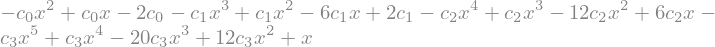

In [27]:
res = expand(residual(u, x))
factor(res)

## Colocación

El método de colocación consiste en forzar que el residual sea cero en un conjunto de puntos.
Este método se puede escribir como un método de residuos ponderados si se elige
como función de ponderación el delta de Dirac, es decir,

$$\int\limits_0^1 R \delta(x - x_i)\, \mathrm{d}x = 0\quad \forall x_i\, ,$$

o equivalentemente

$$R (x_i) = 0\quad \forall x_i\, .$$

La motivación detrás de esto es que si la función debe hacerse 0 en varios puntos, se
acerca a 0 a medida que le número de puntos de colocación aumente.

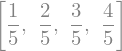

In [28]:
x_colo = [(cont + 1)*S(1)/(nterms + 1) for cont in range(nterms)]
x_colo

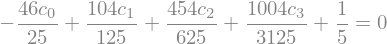

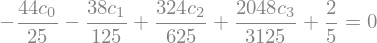

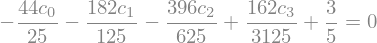

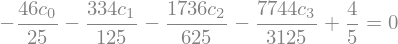

In [29]:
eqs_colo = []
for cont in range(nterms):
    eqs_colo.append(Eq(res.subs(x, x_colo[cont]), 0))
    display(eqs_colo[cont])

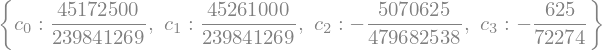

In [30]:
sol_col = solve(eqs_colo, c)
sol_col

In [43]:
np.array(list(sol_col.values())).astype(float)

array([ 0.18834332,  0.18871231, -0.01057079, -0.00864765])

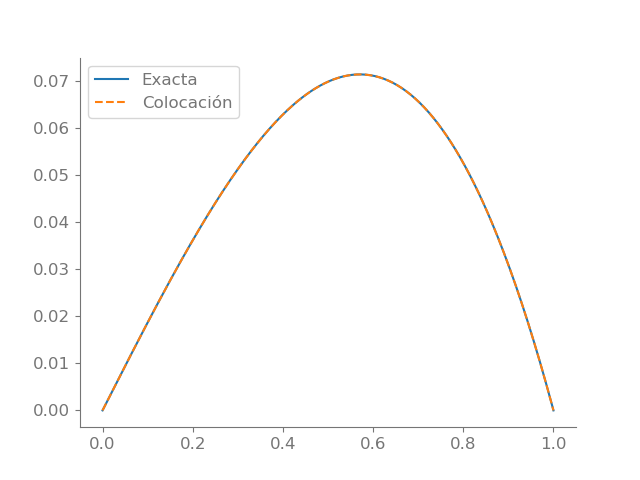

In [14]:
plt.figure()
ax = plt.gca()
plot_expr(u_e, x, ax=ax)
plot_expr(u.subs(sol_col), x, ax=ax, linestyle="dashed")
plt.legend(["Exacta", "Colocación"]);

In [15]:
err_col = integrate((u_e - u.subs(sol_col))**2, (x, 0, 1))/integrate(u_e**2, (x, 0, 1))

In [16]:
N(err_col*100)

### Problemas de valores propios

In [17]:
def residual(u, x, k):
    """Residual para el problema de interés"""
    return diff(u, x, 2) + k**2*u

In [18]:
nterms = 4
u, c = funcion_aprox(x, nterms)
u

In [19]:
k = symbols("k")

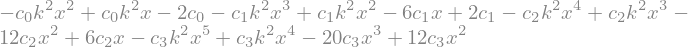

In [20]:
res = expand(residual(u, x, k))
factor(res)

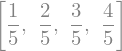

In [21]:
x_colo = [(cont + 1)*S(1)/(nterms + 1) for cont in range(nterms)]
x_colo

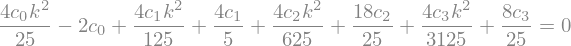

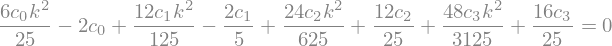

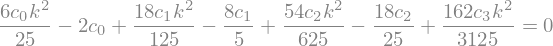

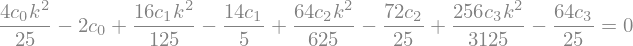

In [22]:
eqs_colo = []
for cont in range(nterms):
    eqs_colo.append(Eq(res.subs(x, x_colo[cont]), 0))
    display(eqs_colo[cont])

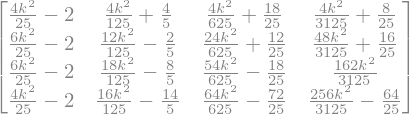

In [23]:
mat_colo = Matrix(nterms, nterms, lambda i, j: diff((eqs_colo[i]).lhs, c[j]))
mat_colo

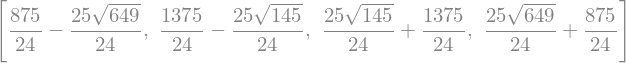

In [24]:
vals_col = solve(det(mat_colo), k**2)
vals_col

In [25]:
[N(sqrt(val), 4) for val in vals_col]